
KNN (k=3) Results:
Accuracy: 0.70
Precision: 0.70
Recall: 0.70
F1-score: 0.70

KNN (k=5) Results:
Accuracy: 0.73
Precision: 0.73
Recall: 0.73
F1-score: 0.73

KNN (k=7) Results:
Accuracy: 0.73
Precision: 0.73
Recall: 0.73
F1-score: 0.72


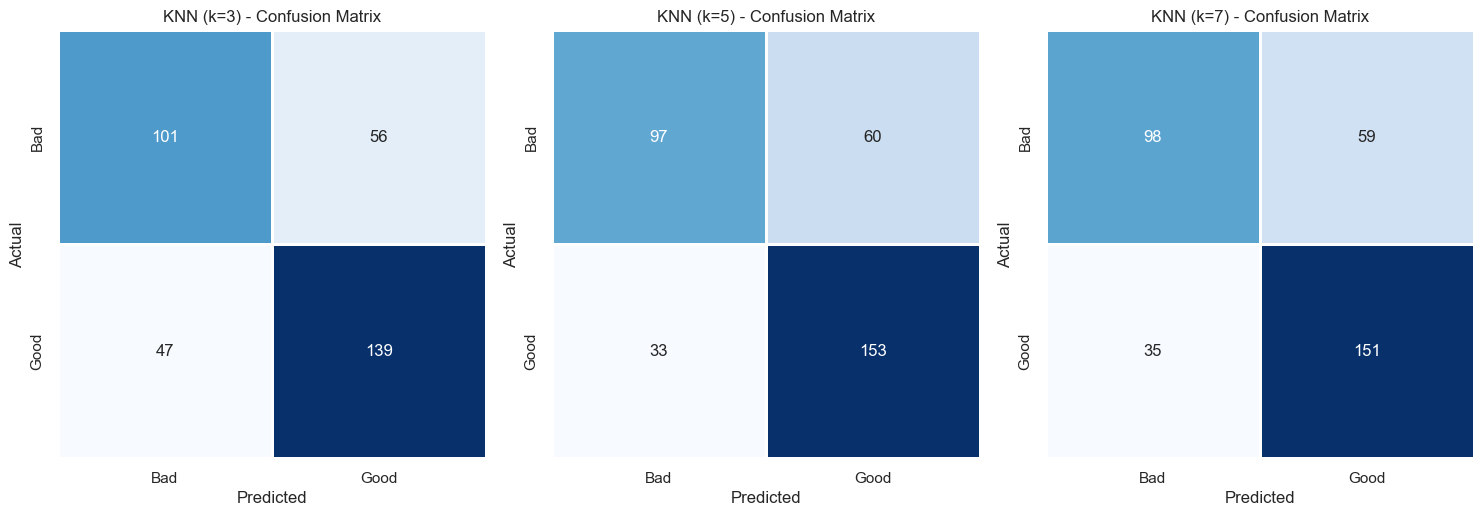

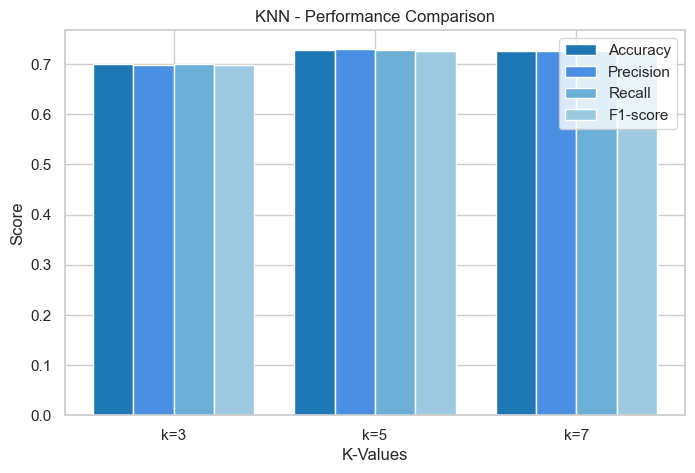

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Load dataset
df = pd.read_csv(r"C:\Users\KIIT\Downloads\archive (3)\WineQT.csv")  

# Convert quality to binary classification: Good (>=6) and Bad (<6)
df["quality"] = df["quality"].apply(lambda x: 1 if x >= 6 else 0)

# Split features and target
X = df.drop(columns=["quality"])
y = df["quality"]

# Train-test split (70%-30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Standardize features for KNN
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define k values to test
k_values = [3, 5, 7]

# Dictionary to store results
knn_results = {}

# Train and evaluate KNN for each k
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)

    # Store evaluation metrics
    knn_results[k] = {
        "accuracy": accuracy_score(y_test, y_pred),
        "precision": precision_score(y_test, y_pred, average='weighted'),
        "recall": recall_score(y_test, y_pred, average='weighted'),
        "f1_score": f1_score(y_test, y_pred, average='weighted'),
        "conf_matrix": confusion_matrix(y_test, y_pred)
    }

# Print metrics for each k
for k, result in knn_results.items():
    print(f"\nKNN (k={k}) Results:")
    print(f"Accuracy: {result['accuracy']:.2f}")
    print(f"Precision: {result['precision']:.2f}")
    print(f"Recall: {result['recall']:.2f}")
    print(f"F1-score: {result['f1_score']:.2f}")

# 🔹 Confusion Matrices
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for i, k in enumerate(k_values):
    ax = axes[i]
    sns.heatmap(knn_results[k]["conf_matrix"], annot=True, fmt='d', cmap="Blues", linewidths=1, square=True,
                xticklabels=["Bad", "Good"], yticklabels=["Bad", "Good"], cbar=False, ax=ax)
    ax.set_title(f"KNN (k={k}) - Confusion Matrix")
    ax.set_xlabel("Predicted")
    ax.set_ylabel("Actual")

plt.tight_layout()
plt.show()

# 🔹 Performance Comparison
accuracy_knn = [knn_results[k]["accuracy"] for k in k_values]
precision_knn = [knn_results[k]["precision"] for k in k_values]
recall_knn = [knn_results[k]["recall"] for k in k_values]
f1_knn = [knn_results[k]["f1_score"] for k in k_values]

metrics_knn = [accuracy_knn, precision_knn, recall_knn, f1_knn]
metrics_names = ["Accuracy", "Precision", "Recall", "F1-score"]
colors = ["#1f77b4", "#4a90e2", "#6baed6", "#9ecae1"]  # Different shades of blue

plt.figure(figsize=(8,5))
x = np.arange(len(k_values))  # Bar positions

for i, metric in enumerate(metrics_knn):
    plt.bar(x + i*0.2, metric, width=0.2, label=metrics_names[i], color=colors[i])

plt.xticks(x + 0.3, [f"k={k}" for k in k_values])
plt.xlabel("K-Values")
plt.ylabel("Score")
plt.title("KNN - Performance Comparison")
plt.legend()
plt.show()


In [18]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

best_k = None
best_accuracy = 0

for k in range(1, 21, 2):  # Testing odd values from 1 to 19
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    
    print(f"K={k}, Accuracy={acc:.4f}")
    
    if acc > best_accuracy:
        best_accuracy = acc
        best_k = k

print(f"\nBest K: {best_k} with Accuracy: {best_accuracy:.4f}")



K=1, Accuracy=0.7405
K=3, Accuracy=0.6997
K=5, Accuracy=0.7289
K=7, Accuracy=0.7259
K=9, Accuracy=0.7114
K=11, Accuracy=0.7143
K=13, Accuracy=0.7085
K=15, Accuracy=0.6910
K=17, Accuracy=0.7055
K=19, Accuracy=0.7085

Best K: 1 with Accuracy: 0.7405


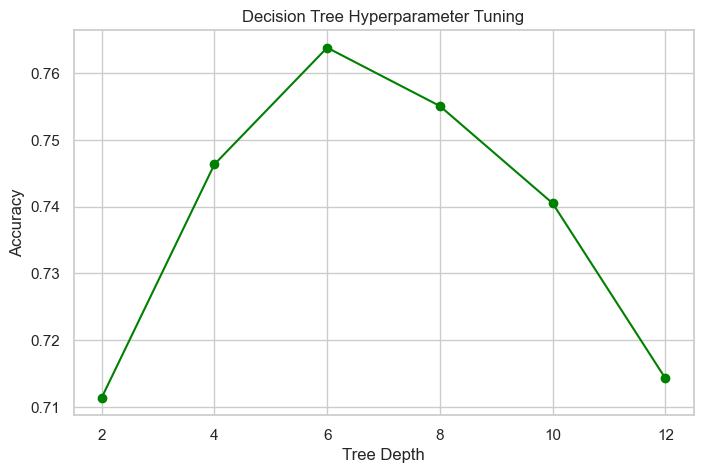

In [19]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

depth_values = [2, 4, 6, 8, 10, 12]
accuracy_list = []

for depth in depth_values:
    dt = DecisionTreeClassifier(max_depth=depth, random_state=42)
    dt.fit(X_train, y_train)
    y_pred = dt.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_list.append(accuracy)

# Plot accuracy vs. max_depth
plt.figure(figsize=(8, 5))
plt.plot(depth_values, accuracy_list, marker="o", linestyle="-", color="green")
plt.xlabel("Tree Depth")
plt.ylabel("Accuracy")
plt.title("Decision Tree Hyperparameter Tuning")
plt.grid(True)
plt.show()


In [20]:
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Calculate performance metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Save results to CSV
model_name = "KNN (k=5)"  # Change this to the actual model name
df_results = pd.DataFrame({"Model": [model_name], "Accuracy": [accuracy], "Precision": [precision], "Recall": [recall], "F1-score": [f1]})
df_results.to_csv(f"{model_name}_results.csv", index=False)
